In [9]:
import numpy as np
import pandas as pd

# Crear un conjunto de datos de ejemplo con las características de entrada y la variable de salida
data = {
    'ResistenciaEsperada': [25, 30, 35, 40],
    'Cemento': [300, 350, 400, 450],
    'Agua': [150, 160, 170, 180],
    'AgregadoFino': [800, 850, 900, 950],
    'AgregadoGrueso': [1000, 1050, 1100, 1150],
    'TiempoCurado': [7, 14, 21, 28],
    'Carga': [15, 20, 25, 30]
}

In [10]:
# Define the input and output variables
X = np.array([data['ResistenciaEsperada'], data['Cemento'], data['Agua'], data['AgregadoFino'], data['AgregadoGrueso'], data['TiempoCurado']]).T
y = np.array(data['Carga'])

In [11]:
y

array([15, 20, 25, 30])

In [13]:
# Resta el valor mínimo para asegurarte de que 'y' comience desde 0
y = y - min(y)

# Crea la codificación one-hot
y = np.eye(max(y) + 1)[y]

In [18]:
y

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [3]:
# Crear un DataFrame de Pandas
cemento_data = pd.DataFrame(data)
# Separar las características de entrada (X) y la variable objetivo de salida (y)
X = cemento_data.drop('Carga', axis=1)  # Características de entrada
y = cemento_data['Carga']  # Variable objetivo (carga)

In [4]:
type(X)

pandas.core.frame.DataFrame

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))  # Capa de entrada con 6 neuronas y función de activación ReLU
model.add(Dense(8, activation='relu'))  # Capa oculta con 8 neuronas y función de activación ReLU
model.add(Dense(1, activation='linear'))  # Capa de salida con 1 neurona (carga) y función lineal (regresión)

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')  # Función de pérdida y optimizador

# Entrenar el modelo con los datos
history = model.fit(X, y, epochs=800, batch_size=2, validation_split=0.2)

Epoch 1/800
2/2 [==============================] - 1s 197ms/step - loss: 11978.8467 - val_loss: 10766.6748
Epoch 2/800
2/2 [==============================] - 0s 39ms/step - loss: 10750.9365 - val_loss: 9482.7832
Epoch 3/800
2/2 [==============================] - 0s 25ms/step - loss: 9629.5166 - val_loss: 8376.3340
Epoch 4/800
2/2 [==============================] - 0s 22ms/step - loss: 8658.2324 - val_loss: 7362.8579
Epoch 5/800
2/2 [==============================] - 0s 29ms/step - loss: 7776.7554 - val_loss: 6457.9126
Epoch 6/800
2/2 [==============================] - 0s 34ms/step - loss: 6954.7329 - val_loss: 5643.0952
Epoch 7/800
2/2 [==============================] - 0s 22ms/step - loss: 6188.2788 - val_loss: 4902.2114
Epoch 8/800
2/2 [==============================] - 0s 36ms/step - loss: 5497.8052 - val_loss: 4230.2930
Epoch 9/800
2/2 [==============================] - 0s 24ms/step - loss: 4861.1816 - val_loss: 3625.1860
Epoch 10/800
2/2 [==============================] - 0s 34ms/

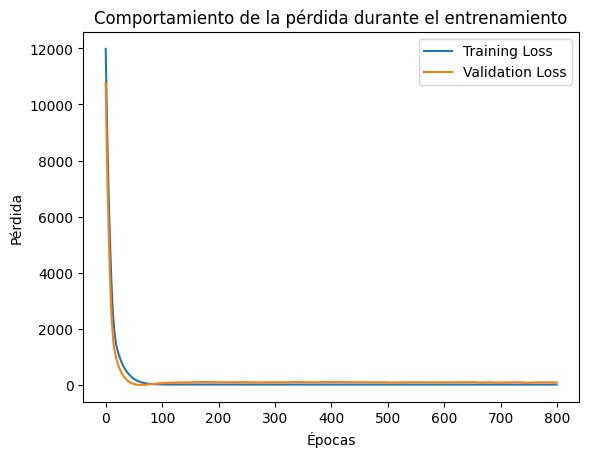

In [6]:
import matplotlib.pyplot as plt

# Mostrar el comportamiento de la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Comportamiento de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [7]:
# Suponiendo que tienes tu modelo previamente entrenado llamado 'model'

def predecir_carga_cemento(model, resistencia, cemento, agua, fino, grueso, tiempo):
    # Formatear las entradas del usuario como un arreglo de Numpy para hacer la predicción
    inputs = np.array([[resistencia, cemento, agua, fino, grueso, tiempo]])
    
    # Realizar la predicción con el modelo entrenado
    predicted_carga = model.predict(inputs)
    
    return predicted_carga[0][0]  # La predicción es un arreglo 2D, por eso se accede al valor con [0][0]

# Obtener las entradas del usuario
resistencia_input = float(input("Ingresa la resistencia esperada: "))
cemento_input = float(input("Ingresa la cantidad de cemento: "))
agua_input = float(input("Ingresa la cantidad de agua: "))
fino_input = float(input("Ingresa la cantidad de agregado fino: "))
grueso_input = float(input("Ingresa la cantidad de agregado grueso: "))
tiempo_input = float(input("Ingresa el tiempo de curado: "))

# Realizar la predicción llamando a la función con las entradas proporcionadas
resultado_prediccion = predecir_carga_cemento(model, resistencia_input, cemento_input, agua_input, fino_input, grueso_input, tiempo_input)

print(f"La carga estimada es: {resultado_prediccion:.2f}")

1/1 [==============================] - 0s 73ms/step
La carga estimada es: 19.15


In [ ]:
# DIVISION DE DATOS DE ENTRADA (X) Y SALIDA (y)
Predictors = ['ResistenciaEsperada', 'Cemento','Agua','AgregadoFino','AgregadoGrueso','TiempoCurado']
TargetVariable = ['Carga']

X=train_ds[Predictors]
y=train_ds[TargetVariable].values